In [1]:
import os, sys

# 🛠 Ustal ścieżkę główną projektu względem notebooka
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH = os.path.join(PROJECT_ROOT, "src")

# 🛠 Upewnij się, że katalog src/ jest widoczny dla Pythona
if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

# 🛠 Import modułów z projektu
from evaluation import evaluate_egarch_out_of_sample
from config import PROJECT_ROOT, PLOTS_DIR

print(f"[setup] Project root: {PROJECT_ROOT}")
print(f"[setup] Source path : {SRC_PATH}")
print(f"[setup] Plots dir   : {PLOTS_DIR}")


[config] Project root: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting
[config] Data path: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\candles\train_sample.csv
[config] Plots directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\plots
[config] Logs directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\logs
[config] Default EGARCH params -> p=1, o=1, q=1, dist=t
[config] Project root: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting
[config] Data path: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\candles\train_sample.csv
[config] Plots directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\plots
[config] Logs directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\logs
[config] Default EGARCH params -> p=1, o=1, q=1, dist=t
[setup] Project root: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting
[setup] Source path : C:\GitHubRepo\dat


══════════════════════════════════════════════════════════════════════
         Loading Model, Training Stats and Out-of-Sample Data         
══════════════════════════════════════════════════════════════════════

✅ Loaded trained EGARCH model from C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\data\egarch_model.pkl
✅ Loaded training statistics from C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\data\train_stats.json
✅ Loaded out-of-sample data (8928 rows)

══════════════════════════════════════════════════════════════════════
               Starting Forecasting (horizon=12 steps)                
══════════════════════════════════════════════════════════════════════


══════════════════════════════════════════════════════════════════════
            Deterministic 12-Step-Ahead EGARCH Forecasting            
══════════════════════════════════════════════════════════════════════



C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\src\feature_engineering.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["log_return"].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\src\evaluation.py:115: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  omega 

🧹 Removed 12 initial rows due to incomplete rolling windows.
📊 Remaining samples for evaluation: 8903 rows.

 ω=-0.069194, α=0.231667, γ=0.000091, β=0.979585
 Last σ=0.204152, horizon=12 steps

 Progress:   445/8903  (  5.0%)
 Progress:   890/8903  ( 10.0%)
 Progress:  1335/8903  ( 15.0%)
 Progress:  1780/8903  ( 20.0%)
 Progress:  2225/8903  ( 25.0%)
 Progress:  2670/8903  ( 30.0%)
 Progress:  3115/8903  ( 35.0%)
 Progress:  3560/8903  ( 40.0%)
 Progress:  4005/8903  ( 45.0%)
 Progress:  4450/8903  ( 50.0%)
 Progress:  4895/8903  ( 55.0%)
 Progress:  5340/8903  ( 60.0%)
 Progress:  5785/8903  ( 65.0%)
 Progress:  6230/8903  ( 70.0%)
 Progress:  6675/8903  ( 75.0%)
 Progress:  7120/8903  ( 80.0%)
 Progress:  7565/8903  ( 85.0%)
 Progress:  8010/8903  ( 90.0%)
 Progress:  8455/8903  ( 95.0%)
 Progress:  8900/8903  (100.0%)
 Progress:  8903/8903  (100.0%)

✅ Deterministic 12-step forecasts completed.
📈 Total evaluated samples: 8903 rows.


════════════════════════════════════════════════

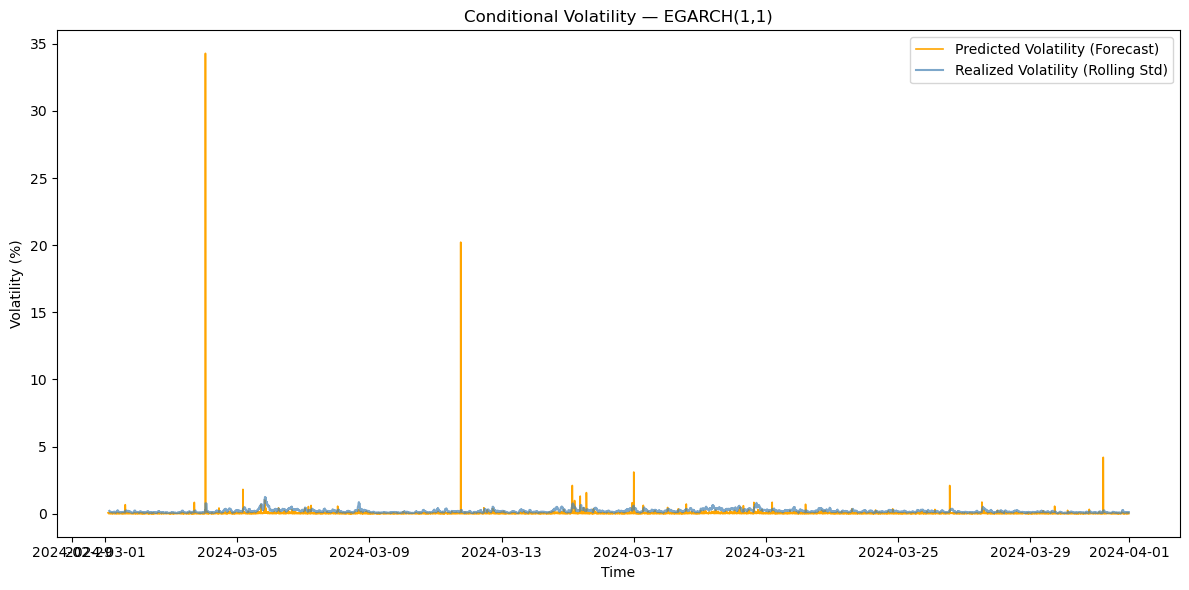


══════════════════════════════════════════════════════════════════════
             3-Day Volatility Comparison (Out-of-Sample)              
══════════════════════════════════════════════════════════════════════


══════════════════════════════════════════════════════════════════════
          3-Day Volatility Comparison Table (Out-of-Sample)           
══════════════════════════════════════════════════════════════════════

Period           Predicted    Realized     AbsDiff      Corr
------------------------------------------------------------
2024-03-01           0.023       0.122       0.099     0.222
2024-03-04           0.094       0.292       0.199     0.122
2024-03-07           0.032       0.181       0.149     0.342
2024-03-10           0.056       0.167       0.111     0.053
2024-03-13           0.044       0.227       0.183     0.283
2024-03-16           0.042       0.220       0.178     0.264
2024-03-19           0.053       0.326       0.273     0.225
2024-03-22           

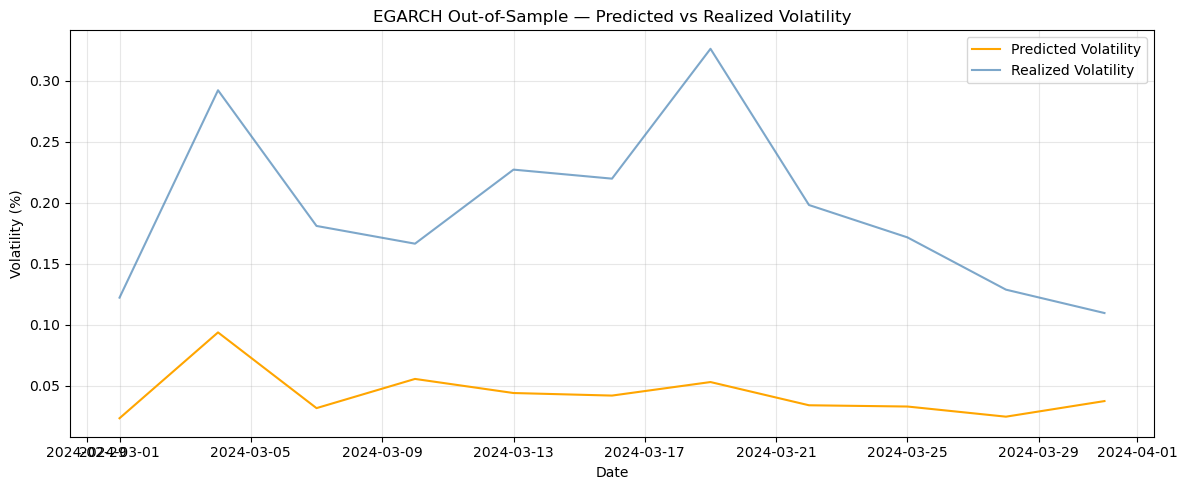

In [2]:

# === Run evaluation ===
weekly_df = evaluate_egarch_out_of_sample()
weekly_df.head()

import matplotlib.pyplot as plt

# === Visualize short segment of predicted vs realized volatility ===
plt.figure(figsize=(12,5))
plt.plot(weekly_df.index, weekly_df["predicted_vol"], label="Predicted Volatility", color="orange")
plt.plot(weekly_df.index, weekly_df["realized_vol"], label="Realized Volatility", color="steelblue", alpha=0.7)
plt.title("EGARCH Out-of-Sample — Predicted vs Realized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



z



**Notatka – analiza wyników EGARCH (out-of-sample)**

Model EGARCH(1,1) na danych testowych wykazał bardzo niską korelację (~0.2) między prognozowaną a zrealizowaną zmiennością, mimo że wizualnie serie są zbliżone. Przyczyną są pojedyncze skrajne wartości (outliery), które znacząco zniekształcają metryki korelacji i błędu.

Wyniki mogą również sugerować **możliwy leakage w zbiorze treningowym** – model mógł nieświadomie korzystać z danych z przyszłości (np. przez overlap rolling window lub niewłaściwy podział czasowy).

**Kroki do wykonania jutro:**

* Zweryfikować, czy dane treningowe i testowe są w pełni rozdzielone czasowo.
* Sprawdzić, czy rolling features nie sięgają do okresu testowego.
* Rozważyć **usunięcie lub winsoryzację 1% skrajnych obserwacji** (outlierów w predicted_vol).
* Ponownie przeliczyć korelację (Pearson i Spearman) po oczyszczeniu danych.
